# 03. The Problem of Vanishing Gradients

## What is it?
When training Deep Neural Networks or RNNs with many time steps, the gradients can become extremely small (vanish) or extremely large (explode) as they are propagated back through the layers/time.

Since the weights $W_{hh}$ are multiplied repeatedly (once for each time step), if the largest singular value of $W_{hh}$ is < 1, the gradients shrink exponentially. If > 1, they explode.

## Impact
- **Vanishing**: Parameters earlier in the sequence don't change much. The model fails to learn long-range dependencies.
- **Exploding**: Weights update too much, causing instability (NaNs).

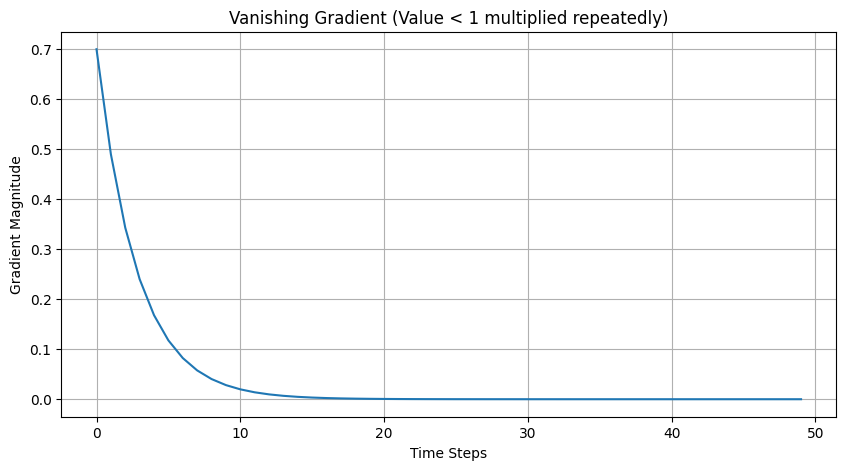

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation of vanishing gradient
np.random.seed(42)

# Repeated multiplication effect
n_steps = 50
gradient_val = 0.7  # < 1

gradients = []
val = 1.0
for i in range(n_steps):
    val = val * gradient_val
    gradients.append(val)

plt.figure(figsize=(10, 5))
plt.plot(gradients)
plt.title('Vanishing Gradient (Value < 1 multiplied repeatedly)')
plt.xlabel('Time Steps')
plt.ylabel('Gradient Magnitude')
plt.grid(True)
plt.show()

## Solutions
1. **Gradient Clipping**: For exploding gradients, we simply cap the norm of the gradient vector.
2. **Gated Architectures**: LSTM and GRU resolve vanishing gradients by using 'gates' to control information flow (covered in next notebooks).
3. **Initialization**: Initialize weights properly (Identity initialization).